<a href="https://colab.research.google.com/github/usintec/BitcoinStockMarket/blob/master/corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install seaborn --quiet

In [14]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

Load Dataset

In [6]:
url = 'https://raw.githubusercontent.com/usintec/BitcoinStockMarket/refs/heads/master/bitcoin_ngx_data_template_csv.csv'
df = pd.read_csv(url)

df.head()

,Date,BTC_Price,BTC_Volume,BTC_Volatility,NGX_ASI,NGX_Volatility
0,2015-01-31 00:00:00,6493.428306,2207479.262,0.060387,25287.30958,0.018721
1,2015-02-28 00:00:00,6716.899704,2885263.559,0.080655,25064.49335,0.010445
2,2015-03-31 00:00:00,8512.276780,3504987.279,0.047825,25535.33164,0.003936
3,2015-04-30 00:00:00,12058.336490,3865755.194,0.058034,25164.77632,0.022035
4,2015-05-31 00:00:00,12090.029740,1799703.593,0.063803,25390.83345,0.012436


Extract X and Y

In [15]:
X = df["BTC_Volume"].tolist()
Y = df["NGX_Volatility"].tolist()
n = len(X)
# Significance level
alpha = 0.05

Means

In [9]:
mean_X = sum(X) / n
mean_Y = sum(Y) / n

Numerator and denominator components

In [10]:
numerator = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n))
denominator_X = math.sqrt(sum((X[i] - mean_X) ** 2 for i in range(n)))
denominator_Y = math.sqrt(sum((Y[i] - mean_Y) ** 2 for i in range(n)))

Correlation coefficient

In [18]:
r = numerator / (denominator_X * denominator_Y)
r_pearson, p_value = pearsonr(X, Y)
print(f"Correlation coefficient (r): {r:.4f}")
print(f"Correlation p value (p_value): {p_value:.4f}")

Correlation coefficient (r): 0.0245
Correlation p value (p_value): 0.7906


Interpretation

In [12]:
if r > 0:
    relation = "Positive correlation — higher BTC volume tends to be associated with higher NGX volatility."
elif r < 0:
    relation = "Negative correlation — higher BTC volume tends to be associated with lower NGX volatility."
else:
    relation = "No linear correlation."
print("Interpretation:", relation)

Interpretation: Positive correlation — higher BTC volume tends to be associated with higher NGX volatility.


In [17]:
if p_value < alpha:
    print("✅ The correlation is statistically significant at the 95% confidence level.")
else:
    print("❌ The correlation is NOT statistically significant at the 95% confidence level.")

❌ The correlation is NOT statistically significant at the 95% confidence level.


Plotting

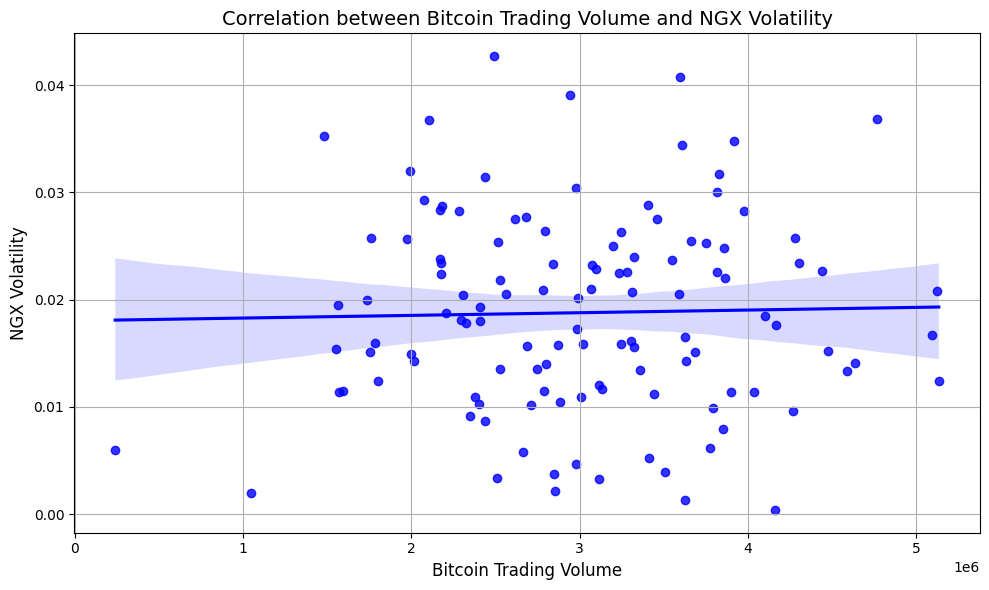

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot(x="BTC_Volume", y="NGX_Volatility", data=df, color="blue", marker="o")

plt.title("Correlation between Bitcoin Trading Volume and NGX Volatility", fontsize=14)
plt.xlabel("Bitcoin Trading Volume", fontsize=12)
plt.ylabel("NGX Volatility", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()